Latest data can be found at: https://www.zillow.com/research/data/

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df_usa = pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


In [69]:
df_usa


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2023-07-31,2023-09-30,2024-06-30
0,102001,0,United States,country,NaN,2023-06-30,0.6,1.6,6.3
1,394913,1,"New York, NY",msa,NY,2023-06-30,0.8,1.4,4.0
2,753899,2,"Los Angeles, CA",msa,CA,2023-06-30,1.2,3.6,5.3
3,394463,3,"Chicago, IL",msa,IL,2023-06-30,0.7,1.4,3.8
4,394514,4,"Dallas, TX",msa,TX,2023-06-30,0.4,1.2,5.1
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,2023-06-30,0.2,0.4,0.9
891,394743,936,"Ketchikan, AK",msa,AK,2023-06-30,-0.5,-0.9,0.9
892,753874,937,"Craig, CO",msa,CO,2023-06-30,1.0,2.5,8.7
893,395188,938,"Vernon, TX",msa,TX,2023-06-30,-1.2,-1.8,1.8


In [70]:
# Get the columns to calculate the sum
columns_to_sum = [ "2023-09-30", "2024-06-30"]

# Calculate the sum for each row in the specified columns
df_usa["Sum"] = df_usa[columns_to_sum].sum(axis=1)

# Filter the DataFrame to include only rows where the sum is negative
df_price_drop = df_usa.loc[df_usa["Sum"] <= -5]

df_price_drop


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2023-07-31,2023-09-30,2024-06-30,Sum
214,394691,221,"Houma, LA",msa,LA,2023-06-30,-0.7,-1.9,-3.8,-5.7
468,394683,481,"Hobbs, NM",msa,NM,2023-06-30,-0.5,-1.4,-3.9,-5.3
587,394878,605,"Morgan City, LA",msa,LA,2023-06-30,-1.3,-2.8,-3.5,-6.3
675,394844,694,"McComb, MS",msa,MS,2023-06-30,-1.5,-3.6,-4.6,-8.2
745,394385,770,"Big Spring, TX",msa,TX,2023-06-30,-0.9,-2.3,-2.7,-5.0
894,394767,939,"Lamesa, TX",msa,TX,2023-06-30,-2.6,-4.7,-5.0,-9.7


In [71]:
cities = df_price_drop["RegionName"]
dates = df_price_drop.columns[6:9]  # Assuming the dates start from the 7th column in the CSV and ignoring SUM 
data = df_price_drop.iloc[:, 6:9]   # Extracting the numerical data for plotting

In [72]:
cities

214          Houma, LA
468          Hobbs, NM
587    Morgan City, LA
675         McComb, MS
745     Big Spring, TX
894         Lamesa, TX
Name: RegionName, dtype: object

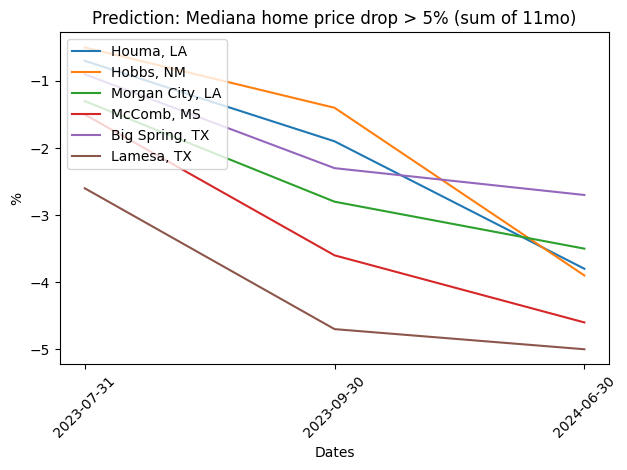

In [73]:

# Create a line plot for each city
for i, city in enumerate(cities):
    plt.plot(dates, data.iloc[i], label=city)


# Customize the plot
plt.xlabel("Dates")
plt.ylabel("%")
plt.title("Prediction: Mediana home price drop > 5% (sum of 11mo)")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
# Show the plot
plt.tight_layout()